In [141]:
import pandas as pd

# Load CSV file into a DataFrame
df = pd.read_csv('./data/no_glitch/signal_glitch_params.csv')
# Display the first few rows
print(df.head())

df2 = pd.read_csv('./data/with_glitch/signal_glitch_params.csv')
# Display the first few rows
print(df2.head())


   n_th_signal  m_th_glitch     f0            f1            f2   f3   f4  \
0            0            0  450.0 -2.586804e-08  6.918300e-18  0.0  0.0   
1            1            0  450.0 -2.052730e-08  1.297650e-17  0.0  0.0   
2            2            0  450.0 -4.667096e-08  2.889312e-17  0.0  0.0   
3            3            0  450.0 -1.818705e-08  3.417274e-18  0.0  0.0   
4            4            0  450.0 -1.845055e-08  2.948970e-17  0.0  0.0   

       phi0       psi      cosi     alpha     delta  
0  3.685169  0.251600  0.394858  6.123768  1.026461  
1  0.126339 -0.329745 -0.092915  6.123768  1.026461  
2  5.208384  0.185378  0.444111  6.123768  1.026461  
3  0.029503 -0.111890  0.732765  6.123768  1.026461  
4  4.258847 -0.572596  0.951043  6.123768  1.026461  
   n_th_signal  m_th_glitch     f0            f1            f2   f3   f4  \
0            0            0  450.0 -2.586804e-08  6.918300e-18  0.0  0.0   
1            0            1  450.0 -2.586804e-08  6.918300e-18  0.0

In [34]:
from pyfstat.utils import get_sft_as_arrays

filename ='/home/hoitim.cheung/SFTs/o4a_data/SFTs/narrowBand_age300yr/240days/H1/100/H-7338_H1_1800SFT_O4RUN+R1+CGDSCALIBSTRAINCLEANGATEDG02+WTKEY5_NBF0099Hz0W0003Hz0-1368980712-20472783.sft'
data = get_sft_as_arrays(filename)

25-09-10 14:54:48.887 pyfstat.utils.sft INFO    : Loading 7338 SFTs from H1...


In [42]:
x = np.diff(data[1]['H1'])

x[x!=1800].size

599

In [55]:
from pyfstat.utils import get_sft_as_arrays

filename ='./data/no_glitch/simCW0/H-4800_H1_1800SFT_simCW0_NBF0449Hz0W0002Hz0-1368970000-8640000.sft'
data = get_sft_as_arrays(filename)

25-09-10 21:43:57.524 pyfstat.utils.sft INFO    : Loading 4800 SFTs from H1...


In [58]:
data[0][0],data[0][-1]

(449.0, 450.99944444444446)

In [90]:
import numpy as np
def grid_size(m, T, factor=1):
    df = 2 * np.sqrt(3*m) / np.pi / T
    df1 = 12 * np.sqrt(5*m) / np.pi / T**2
    df2 = 20 * np.sqrt(7*m) / np.pi / T**3
    return [df*factor, df1*factor, df2*factor]

m = 0.2 
tcoh = 86400*5
factor = 4
dx = grid_size(m, tcoh, factor)

In [121]:
m = 0.2 
tcoh = 86400*5
factor = 4
dx = grid_size(m, tcoh, factor)

In [123]:
homedir = '/home/hoitim.cheung/glitch/'
n = 100

for i in range(n):
    command = (
        f"lalpulsar_Weave "
        f"--output-file={homedir+'results/with_glitch_CW'+{i}+'.fts'} "
        f"--sft-files={homedir+'data/with_glitch/xxx'}' "
        f"--setup-file={homedir}+'metric/metric_5d.fts' "
        f"--semi-max-mismatch=0.2 "
        f"--coh-max-mismatch=0.1 "
        f"--toplist-limit=1000 "
        f"--extra-statistics='coh2F_det,mean2F,coh2F_det,mean2F_det' "
        f"--alpha={df['alpha'][i]}/0 "
        f"--delta={df['delta'][i]}/0 "
        f"--freq={df['f0'][i]-dx[0]}/{2*dx[0]} "
        f"--f1dot={df['f1'][i]-dx[1]}/{2*dx[1]} "
        f"--f2dot={df['f2'][i]-dx[2]}/{2*dx[2]}"
    )

"lalpulsar_Weave --output-file='test_glitch_10d.fts' --sft-files='./data/with_glitch/simCW0/H-4800_H1_1800SFT_simCW0_NBF0449Hz0W0002Hz0-1368970000-8640000.sft' --setup-file='test_metric_10d.fts' --semi-max-mismatch=0.2 --coh-max-mismatch=0.1 --toplist-limit=1000 --extra-statistics='coh2F_det,mean2F,coh2F_det,mean2F_det' --alpha=6.12376766/0 --delta=1.0264611/0 --freq=449.9999988585103/2.2829794224499995e-06 --f1dot=-2.587827352833667e-08/2.046745667334045e-11 --f2dot=-1.6439552550458482e-17/4.671570472091696e-17"

lalpulsar_Weave --output-file='test_glitch.fts' --sft-files='./data/with_glitch/simCW0/H-4800_H1_1800SFT_simCW0_NBF0449Hz0W0002Hz0-1368970000-8640000.sft' --setup-file='test_metric.fts' --semi-max-mismatch=0.2 --coh-max-mismatch=0.1 --toplist-limit=1000 --extra-statistics='coh2F_det,mean2F,coh2F_det,mean2F_det' --alpha=6.12376766/0 --delta=1.0264611/0 --freq=449.9999988585103/2.2829794224499995e-06 --f1dot=-2.587827352833667e-08/2.046745667334045e-11 --f2dot=-1.6439552550458482e-17/4.671570472091696e-17

In [77]:
from astropy.io import fits 


In [81]:
d1 = fits.open('./test.fts')
d2 = fits.open('./test_glitch.fts')

In [83]:
d1[1].data['mean2F'][:5], d2[1].data['mean2F'][:5]

(array([23.370684, 21.537443, 20.785812, 20.640606, 19.693975], dtype='>f4'),
 array([8.86996 , 8.861069, 8.838789, 8.599602, 8.578539], dtype='>f4'))

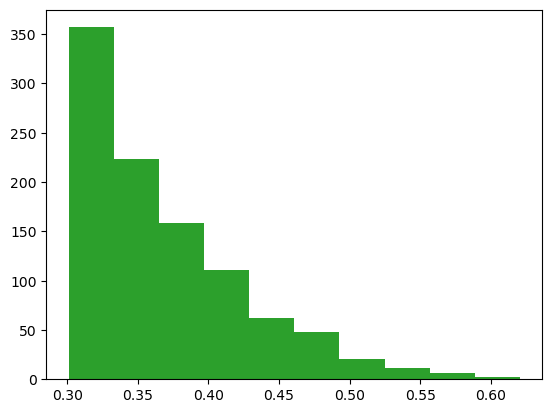

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist((d1[1].data['mean2F']-d2[1].data['mean2F'])/d1[1].data['mean2F'])
plt.show()

In [115]:
d1 = fits.open('./test_10d.fts')
d2 = fits.open('./test_glitch_10d.fts')

print(d1[1].data['mean2F'][:5], d2[1].data['mean2F'][:5])

[44.852654 41.658066 39.179073 37.83506  37.467773] [14.147722 13.73482  13.731223 13.126192 13.116727]


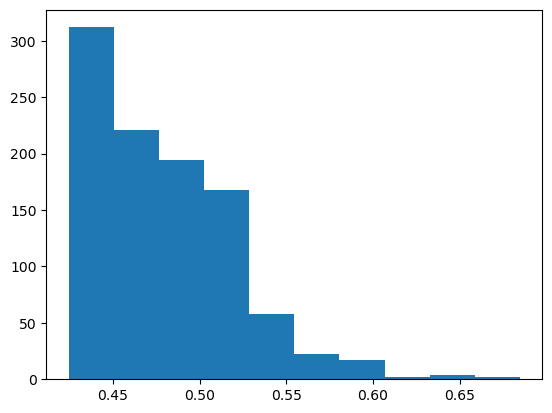

In [116]:
plt.hist((d1[1].data['mean2F']-d2[1].data['mean2F'])/d1[1].data['mean2F'])
plt.show()

[23.370684 21.537443 20.785812 20.640606 19.693975] [44.852654 41.658066 39.179073 37.83506  37.467773]


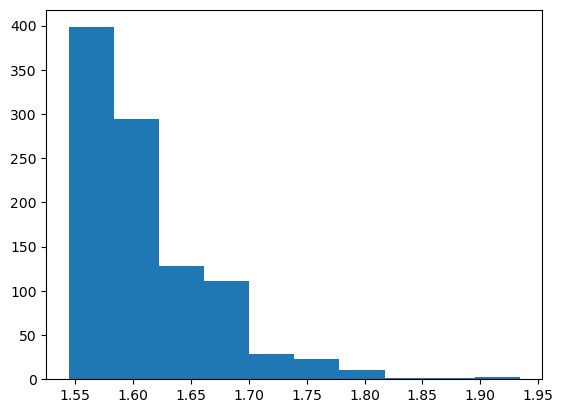

In [103]:
d1 = fits.open('./test.fts')
d2 = fits.open('./test_10d.fts')

print(d1[1].data['mean2F'][:5], d2[1].data['mean2F'][:5])

plt.hist((d2[1].data['mean2F'])/d1[1].data['mean2F'])
plt.show()

In [ ]:
d1 = fits.open('./test_glitch.fts')
d2 = fits.open('./test_glitch_10d.fts')

print(d1[1].data['mean2F'][:5], d2[1].data['mean2F'][:5])

plt.hist((d2[1].data['mean2F'])/d1[1].data['mean2F'])
plt.show()

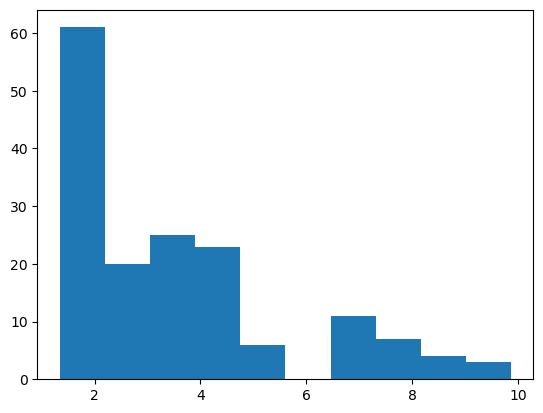

In [139]:
res = []
for i in range(32):
    d1 = fits.open(f'./results/5d/no_glitch_CW{i}.fts')
    d2 = fits.open(f'./results/5d/with_glitch_CW{i}.fts')

    r = d1[1].data['mean2F'][:5]/d2[1].data['mean2F'][:5]
    res.append(r)

plt.hist(np.concatenate(res))
#plt.xscale('log')
plt.show()

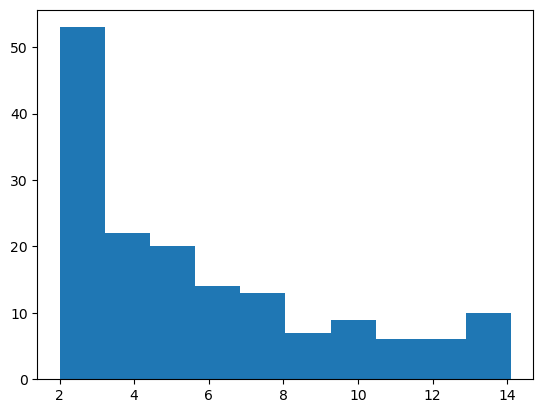

In [140]:
res = []
for i in range(32):
    d1 = fits.open(f'./results/10d/no_glitch_CW{i}.fts')
    d2 = fits.open(f'./results/10d/with_glitch_CW{i}.fts')

    r = d1[1].data['mean2F'][:5]/d2[1].data['mean2F'][:5]
    res.append(r)

plt.hist(np.concatenate(res))
#plt.xscale('log')
plt.show()

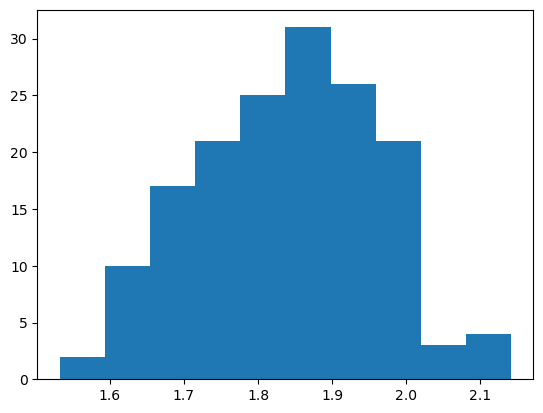

In [135]:
res = []
for i in range(32):
    d1 = fits.open(f'./results/10d/no_glitch_CW{i}.fts')
    d2 = fits.open(f'./results/5d/no_glitch_CW{i}.fts')

    r = d1[1].data['mean2F'][:5]/d2[1].data['mean2F'][:5]
    res.append(r)

plt.hist(np.concatenate(res))
#plt.xscale('log')
plt.show()

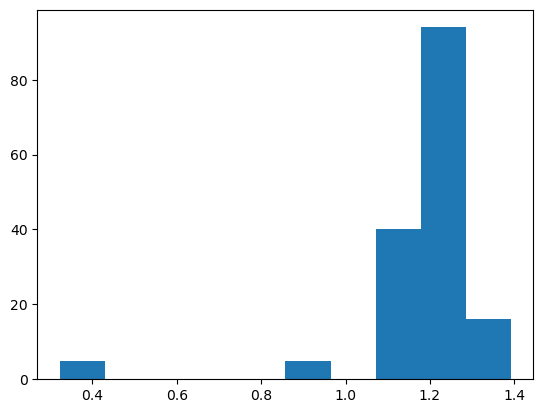

In [138]:
res = []
for i in range(32):
    d1 = fits.open(f'./results/10d/with_glitch_CW{i}.fts')
    d2 = fits.open(f'./results/5d/with_glitch_CW{i}.fts')

    r = d1[1].data['mean2F'][:5]/d2[1].data['mean2F'][:5]
    res.append(r)

plt.hist(np.concatenate(res))
#plt.xscale('log')
plt.show()

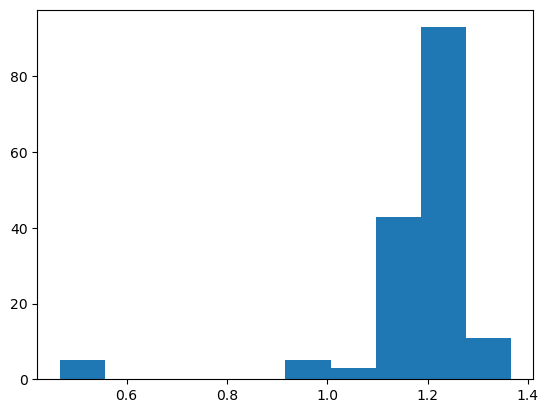

In [143]:
res = []
for i in range(32):
    d1 = fits.open(f'./results/10d/with_glitch_goodCase_CW{i}.fts')
    d2 = fits.open(f'./results/5d/with_glitch_goodCase_CW{i}.fts')

    r = d1[1].data['mean2F'][:5]/d2[1].data['mean2F'][:5]
    res.append(r)

plt.hist(np.concatenate(res))
#plt.xscale('log')
plt.show()

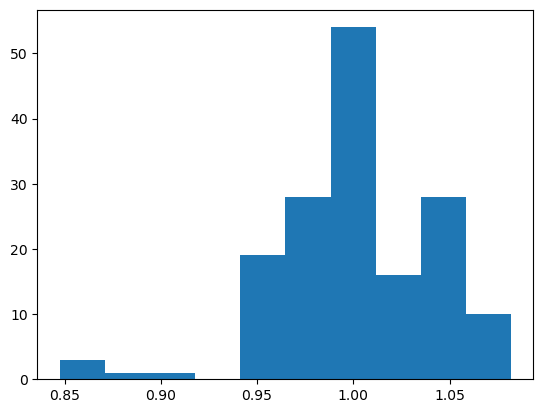

In [148]:
res = []
for i in range(32):
    d1 = fits.open(f'./results/5d/with_glitch_CW{i}.fts')
    d2 = fits.open(f'./results/5d/with_glitch_goodCase_CW{i}.fts')

    r = d1[1].data['mean2F'][:5]/d2[1].data['mean2F'][:5]
    res.append(r)

plt.hist(np.concatenate(res))
#plt.xscale('log')
plt.show()

In [168]:
i = 0 
d1 = fits.open(f'./results/5d/no_glitch_CW{i}.fts')
d2 = fits.open(f'./results/5d/with_glitch_CW{i}.fts')


In [169]:
d1[1].data['coh2F_H1'][0]

array([ 8.926504, 47.97625 , 28.363565, 28.213156, 21.3011  , 39.276665,
       31.08508 , 38.54354 , 20.048424, 17.25848 , 23.235926, 27.139254,
       26.240181, 25.732943, 23.132383, 12.050399,  6.662976, 12.008749,
       12.904875, 11.850361], dtype='>f4')

In [170]:
d2[1].data['coh2F_H1'][0]

array([ 2.9927444 , 16.748585  ,  7.502404  , 17.732496  ,  0.39915663,
        7.3653107 ,  3.7917538 ,  1.8649892 , 15.974707  ,  1.1791039 ,
       27.281052  ,  1.7118919 ,  1.1019003 , 13.509737  ,  2.3654807 ,
       10.634584  , 39.07148   , 33.647263  ,  5.302541  ,  8.046624  ],
      dtype='>f4')

In [172]:
d2[1].data['coh2F_H1'][0]/d1[1].data['coh2F_H1'][0]

array([0.335265  , 0.34910157, 0.26450852, 0.6285187 , 0.01873878,
       0.18752383, 0.12197986, 0.04838656, 0.7968061 , 0.06832026,
       1.1740893 , 0.06307808, 0.04199286, 0.5249978 , 0.10225841,
       0.88250893, 5.8639684 , 2.8018956 , 0.4108944 , 0.67901933],
      dtype=float32)

In [173]:
d2[1].data['coh2F_H1'][1]/d1[1].data['coh2F_H1'][0]

array([1.11878   , 0.02951068, 0.38229975, 0.15585922, 0.3255344 ,
       0.06067304, 0.13987195, 0.37490445, 0.80194104, 0.07545131,
       1.1740893 , 0.06307808, 0.04199286, 0.39387834, 0.07423865,
       1.0950752 , 5.8639684 , 2.8018956 , 0.31021973, 0.6094539 ],
      dtype=float32)

In [174]:
d2[1].data['coh2F_H1'][2]/d1[1].data['coh2F_H1'][0]

array([0.26844895, 0.2631654 , 0.22823861, 0.6270463 , 0.01873878,
       0.10776121, 0.12184732, 0.22101918, 0.80194104, 0.16125968,
       1.1161659 , 0.04385437, 0.03187893, 0.5361911 , 0.08787874,
       0.88250893, 5.8639684 , 1.3661836 , 0.49712443, 0.5098243 ],
      dtype=float32)

In [185]:
d2[1].data[0][:-7], d1[1].data[0][:-7]

((11988, 6.12376766, 1.0264610999999997, 449.9999989936456, -2.5942609059129485e-08, 2.719483587735046e-17, 10.911191),
 (14007, 6.12376766, 1.0264610999999997, 449.9999997700804, -2.5867855249727426e-08, 7.017528830068509e-18, 23.097542))

In [188]:
d2[1].data[0]['coh2F_H1'], d1[1].data[0]['coh2F_H1']

(array([ 2.9927444 , 16.748585  ,  7.502404  , 17.732496  ,  0.39915663,
         7.3653107 ,  3.7917538 ,  1.8649892 , 15.974707  ,  1.1791039 ,
        27.281052  ,  1.7118919 ,  1.1019003 , 13.509737  ,  2.3654807 ,
        10.634584  , 39.07148   , 33.647263  ,  5.302541  ,  8.046624  ],
       dtype='>f4'),
 array([ 8.926504, 47.97625 , 28.363565, 28.213156, 21.3011  , 39.276665,
        31.08508 , 38.54354 , 20.048424, 17.25848 , 23.235926, 27.139254,
        26.240181, 25.732943, 23.132383, 12.050399,  6.662976, 12.008749,
        12.904875, 11.850361], dtype='>f4'))

In [189]:
for i in range(5):
    print(d2[1].data[i]['coh2F_H1'])

[ 2.9927444  16.748585    7.502404   17.732496    0.39915663  7.3653107
  3.7917538   1.8649892  15.974707    1.1791039  27.281052    1.7118919
  1.1019003  13.509737    2.3654807  10.634584   39.07148    33.647263
  5.302541    8.046624  ]
[ 9.986794   1.4158119 10.843384   4.39728    6.934241   2.3830345
  4.347931  14.450145  16.077654   1.302175  27.281052   1.7118919
  1.1019003 10.135649   1.717317  13.196094  39.07148   33.647263
  4.003347   7.2222486]
[ 2.3963106  12.6256895   6.473661   17.690954    0.39915663  4.232501
  3.7876334   8.518862   16.077654    2.783097   25.935148    1.1901748
  0.836509   13.797774    2.0328448  10.634584   39.07148    16.406157
  6.4153285   6.0416017 ]
[ 4.665436   9.367485   8.195313   2.129436  10.253812  13.426019
  2.4853518 11.565009   7.136861   3.650414   2.3104448  4.5205235
 14.957213   5.222825  13.94949   13.953859  26.103312  29.536533
  5.13714    5.832962 ]
[ 1.6074452  3.0851526  8.82842    6.1679792  7.19799    6.354485
  0.73

In [186]:
df.iloc[0][:-7]

n_th_signal    0.000000e+00
m_th_glitch    0.000000e+00
f0             4.500000e+02
f1            -2.586804e-08
f2             6.918300e-18
Name: 0, dtype: float64

In [171]:
df2.iloc[0][-7:]

tglitch        1.370579e+09
df_p           1.723786e-04
df_t           9.432171e-04
df1_p         -3.937795e-11
tau            1.728000e+06
Q              8.454829e-01
tglitch_day    1.862000e+01
Name: 0, dtype: float64